In [2]:
import numpy as np
import pandas as pd
import math
import scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

#change default plot settings
default_figsize = mpl.rcParamsDefault['figure.figsize']
mpl.rcParams['figure.figsize'] = [1.5*val for val in default_figsize]
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)
mpl.rc('axes', linewidth=3)

In [3]:
#Constants
pi = math.pi
heV = 4.14e-15 #eV*s
c = 2.99792e8 #m/s
kbeV = 8.6173e-5 #eV/K
keV = 8.6173e-5 #eV/K
h = 6.626e-34
kb = 1.38065e-23
q = 1.60218e-19
k = 1.3806488e-23
T = 300

CellAreacm = 0.0608;
CellArea = CellAreacm*10**-4 #m^2
Ps=100 #mW/cm^2

Optimization terminated successfully.
         Current function value: -9.402544
         Iterations: 12
         Function evaluations: 24


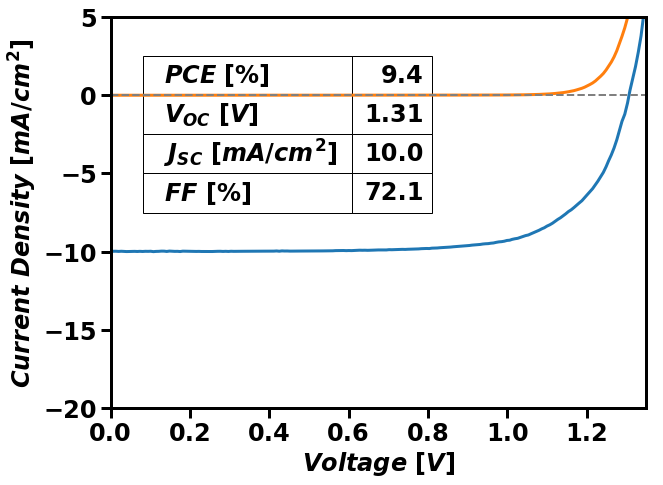

In [15]:
Directory = '2018_8-16JV/8-17_MolES/'
LName = '5_7l_aftertracks';
DName = '5_7d';

Ldata = np.loadtxt(Directory + LName)
Ddata = np.loadtxt(Directory + DName)
Ldata = np.insert(Ldata, 3, 1000*Ldata[:,2]/CellAreacm, axis=1)
Ddata = np.insert(Ddata, 3, 1000*Ddata[:,2]/CellAreacm, axis=1)

JVinterp = interp1d(Ldata[:,1], Ldata[:,3], kind='cubic')

JscL = -JVinterp(0)
VocL = scipy.optimize.fsolve(JVinterp,.95*max(Ldata[:,1]))
PPV = scipy.optimize.fmin(lambda x: x*JVinterp(x),.8*VocL)
PCE = -PPV*JVinterp(PPV)
FF = PCE/(JscL*VocL)*100

datas = [PCE, VocL, JscL, FF]
n_rows = len(datas)
rows = ['$PCE\ [\%]$', '$V_{OC}\ [V]$', '$J_{SC}\ [mA/cm^2]$', '$FF\ [\%]$']
cell_text = []
for row in range(n_rows):
    if row != 1:
        cell_text.append(['%1.1f' % datas[row]])
    else:
        cell_text.append(['%1.2f' % datas[row]])

plt.plot(Ldata[:,1],Ldata[:,3],Ddata[:,1],Ddata[:,3],linewidth=3.0)
plt.plot([0, 1.35], [0, 0], color='.5', linestyle='--', linewidth=2)
plt.xlabel('$Voltage\ [V]$')
plt.ylabel('$Current\ Density\ [mA/cm^2]$')
plt.ylim(-20,5)
plt.xlim(0,1.35)
plt.table(cellText = cell_text,rowLabels = rows,loc='bottom',bbox = [0.45, 0.5, 0.15, 0.4])
plt.tick_params(which='both', width=3,length=10)

In [5]:
.9*max(Ldata[:,1])

1.2150000000000001

In [102]:
FF

array([ 67.68474258])